# Visualizaciones y Conclusiones

A continuación se muestran los principales insights obtenidos tras el análisis exploratorio de los datos y las visualizaciones realizadas.

⚠️ **Nota**: El dataset es relativamente pequeño, por lo que los resultados deben interpretarse con cautela. Con un conjunto de datos más completo, los insights podrían variar significativamente.

- (1.1) Desde el año 2000 hasta el 2022, se redujo tanto la inversión como los beneficios obtenidos. 
- (1.2) El 60% de las películas del Top 5 de mayor presupuesto también están en el Top 5 de mayor recaudación, demostrando la correlación positiva (0.58). 
- (1.3) No existe ninguna relación entre la valoración IMdB y la recaudación generada. 
- (1.4) El año 2020 cuenta con mayor cantidad de películas.
- (1.5) Drama, Comedy y Thriller son los tres géneros que cuentan con más cantidad de películas y por tanto, también los más rentables.
- (1.5) Sin embargo, los géneros mejor valorados son Documentary, Action y Comedy.
- (1.6) El año 2003 tiene las películas con mejor valoración media (8.2 IMdB), seguido por 2016 y 2007 con la misma (7.2 IMdB). 
- (1.6) 2019 es el año con peor valoracion media (3.9 IMdB).
- (1.7) La valoracion (imdb_rating) media de las pelñiculas es 5.77.
- (1.7) La mayoría de peliculas del dataset tienen valoraciones medias (entre el 4.8 y el 5.7), seguido por valoraciones medio-altas como el 7.
- (1.7) Pocas películas tienen valoraciones extremas positivas y ninguna negativa extrema.

In [1]:
# =========================
# 1️⃣ Librerías core
# =========================
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n  # Para convertir strings numéricos a números

# =========================
# 2️⃣ Configuración de pandas
# =========================
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
# pd.set_option('display.float_format', '{:,.0f}'.format)  # Formato sin notación científica

# =========================
# 3️⃣ Configuración de gráficos
# =========================
sns.set(style="whitegrid")           # Estilo de Seaborn
sns.set_palette("Set2")              # Paleta de colores
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# =========================
# 4️⃣ Configuración general
# =========================
import warnings
warnings.filterwarnings("ignore")  # Ocultar warnings innecesarios


In [2]:
# Convertir el csv a DataFrame
df_movies = pd.read_csv(f"../data/clean_movies_dataset.csv")   

# Correlación variables numéricas
- Ligera Correlación negativa: 
    1. budget y año
    2. revenue y año

- Correlación positiva:
    1. revenue y budget

- Sin relación:
    1. revenue y rating

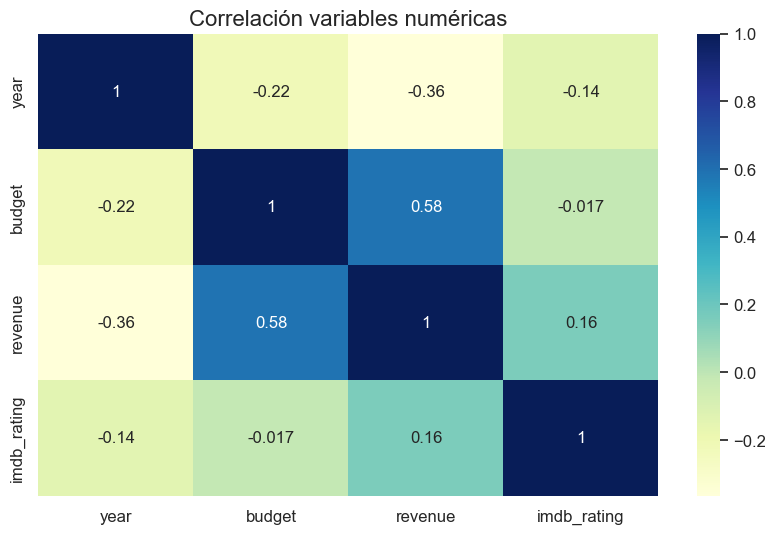

In [3]:
# Matriz de correlación
corr = df_movies.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="YlGnBu",
            annot=True) # para ver la correlación en números
plt.title("Correlación variables numéricas", fontsize=16)
plt.savefig("../reports/correlacion1.png", dpi=300, bbox_inches="tight")
plt.show()

## 1.1 Año vs. Budget, Revenue
- Desde el año 2000 hasta el 2022, tanto la inversión como la recaudación obtenida han disminuido, lo que confirma la relación positiva entre Budget y Revenue.

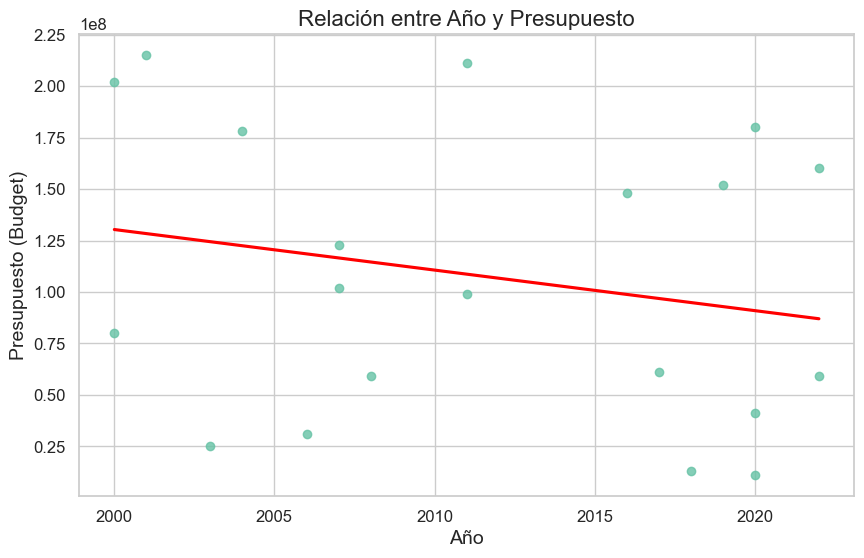

In [4]:
# Budget vs Year
sns.regplot(
    x="year", 
    y="budget", 
    data=df_movies, 
    line_kws={"color":"red"}, 
    ci=None)

plt.title("Relación entre Año y Presupuesto")
plt.ylabel("Presupuesto (Budget)")
plt.xlabel("Año")
plt.savefig("../reports/relacion_año_budget1.png", dpi=300, bbox_inches="tight")
plt.show()

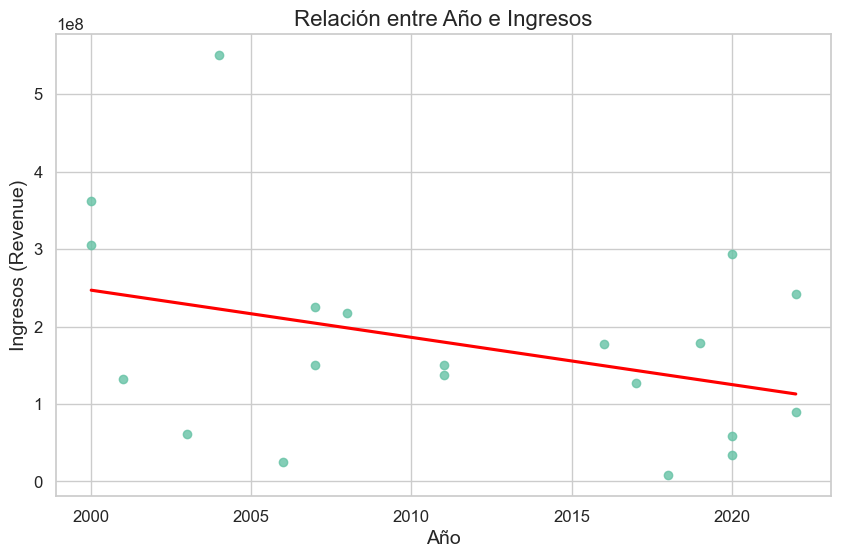

In [5]:
# Revenue vs Year
sns.regplot(
    x="year", 
    y="revenue", 
    data=df_movies, 
    line_kws={"color":"red"}, 
    ci=None)

plt.title("Relación entre Año e Ingresos")
plt.ylabel("Ingresos (Revenue)")
plt.xlabel("Año")
plt.savefig("../reports/relacion_año_revenue1.png", dpi=300, bbox_inches="tight")
plt.show()

**1.2. Top 5 peliculas con mayor recaudación e inversión**
- Aquí podemos ver como algunas de las películas con mayor presupuesto coínciden con las películas con mayor recaudación.

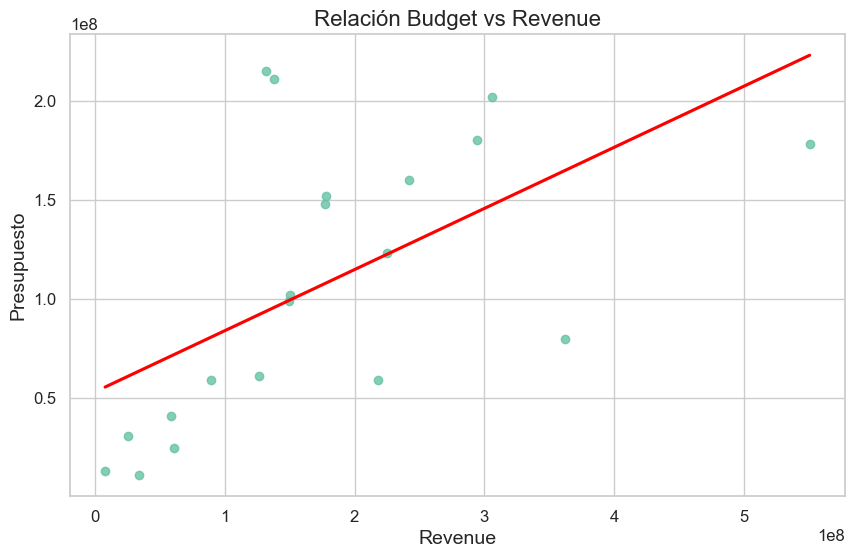

In [6]:
# Regplot budget/revenue
sns.regplot(data=df_movies, 
            y="budget", 
            x="revenue", 
            line_kws={"color":"red"}, 
            ci=None)

plt.title("Relación Budget vs Revenue")
plt.ylabel("Presupuesto")
plt.xlabel("Revenue")
plt.savefig("../reports/relacion_budget_revenue1.png", dpi=300, bbox_inches="tight")
plt.show()

In [7]:
# Extraer top5 de revenue, budget, imdb_rating
top_revenue = df_movies.sort_values("revenue", ascending=False).head()
top_budget = df_movies.sort_values("budget", ascending=False).head()
top_rating = df_movies.sort_values("imdb_rating", ascending=False).head()

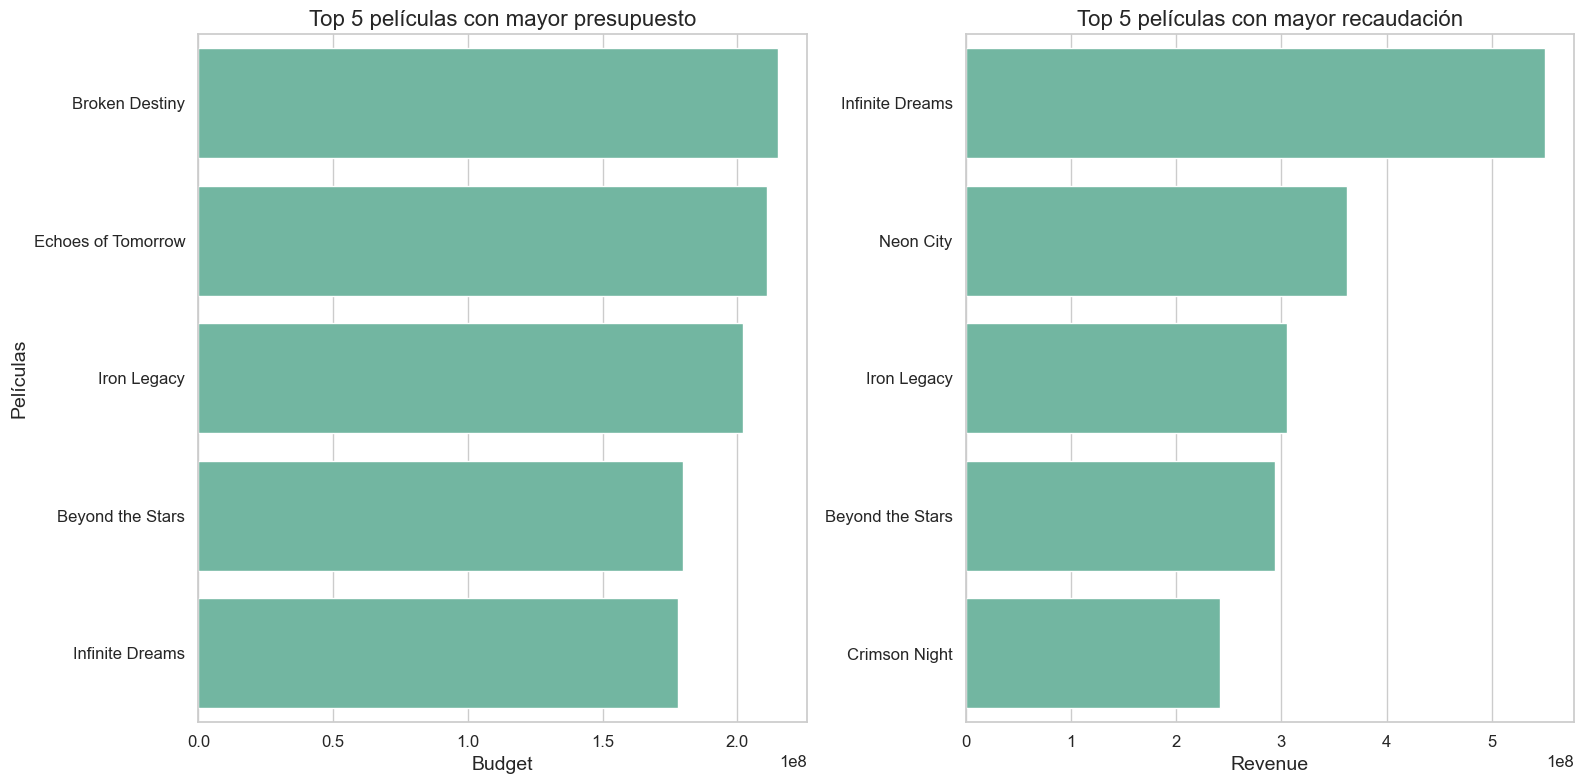

In [9]:
# Figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Barplot recaudación
sns.barplot(x="revenue",
            y="title",
            data=top_revenue,
            ax=axes[1])

axes[1].set_title("Top 5 películas con mayor recaudación")
axes[1].set_xlabel("Revenue")
axes[1].set_ylabel("")

# Barplot de rating
sns.barplot(x="budget",
            y="title",
            data=top_budget,
            ax=axes[0])

axes[0].set_title("Top 5 películas con mayor presupuesto")
axes[0].set_xlabel("Budget")
axes[0].set_ylabel("Películas")

plt.tight_layout()
plt.savefig("../reports/top5_budget_revenue1.png", dpi=300, bbox_inches="tight")
plt.show()

**1.3. Top 5 peliculas con mas recaudación y mayor rating**
- No existe ninguna relación entre la valoración IMdB y la recaudación generada.

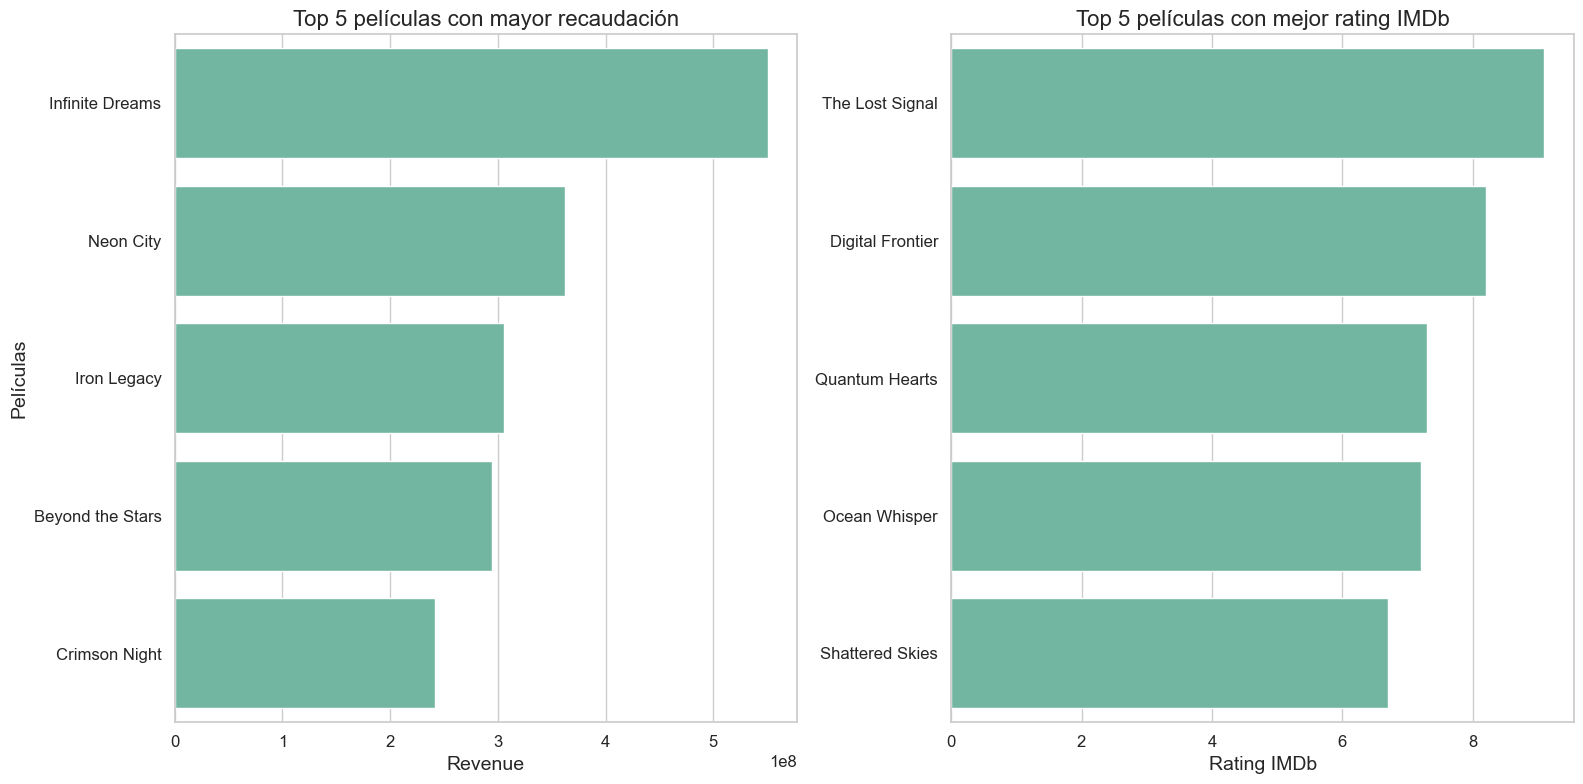

In [10]:
# Figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Barplot recaudación
sns.barplot(x="revenue",
            y="title",
            data=top_revenue,
            ax=axes[0])

axes[0].set_title("Top 5 películas con mayor recaudación")
axes[0].set_xlabel("Revenue")
axes[0].set_ylabel("Películas")

# Barplot rating
sns.barplot(x="imdb_rating",
            y="title",
            data=top_rating,
            ax=axes[1])

axes[1].set_title("Top 5 películas con mejor rating IMDb")
axes[1].set_xlabel("Rating IMDb")
axes[1].set_ylabel("")

plt.tight_layout()
plt.savefig("../reports/top5_revenue_rating1.png", dpi=300, bbox_inches="tight")
plt.show()

**1.4 ¿Cual es el año con más películas?**
- El año 2020 cuenta con mayor cantidad de películas

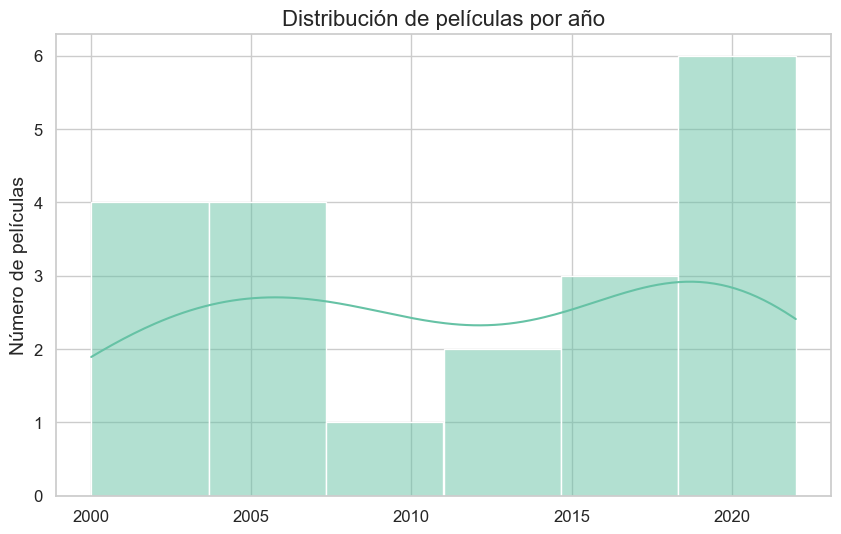

In [11]:
# Histplot year
sns.histplot(df_movies["year"], kde=True)
plt.title("Distribución de películas por año")
plt.xlabel("")
plt.ylabel("Número de películas")
plt.savefig("../reports/distribucion_per_year1.png", dpi=300, bbox_inches="tight")
plt.show()

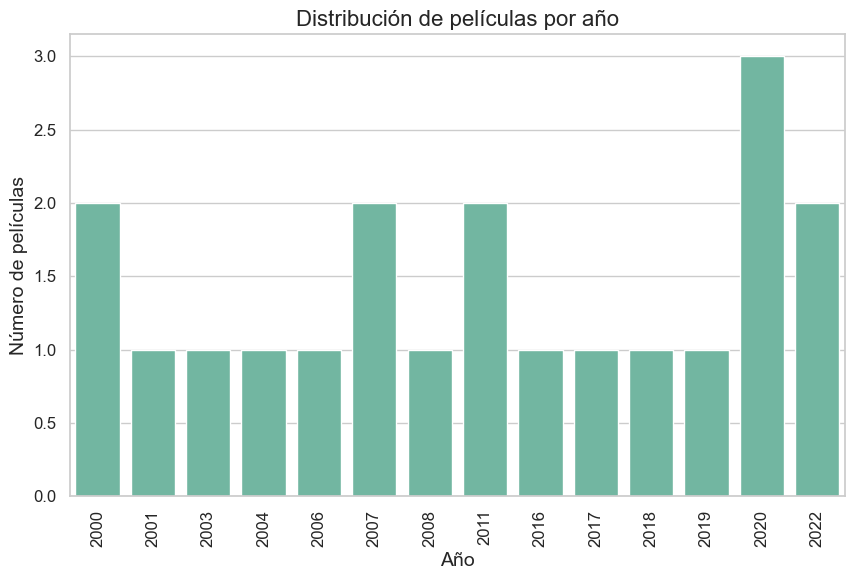

In [12]:
# Countplot year
sns.countplot(
    x="year", 
    data=df_movies)  # Para que salga ordenado

plt.title("Distribución de películas por año")
plt.xlabel("Año")
plt.ylabel("Número de películas")
plt.xticks(rotation=90)
plt.savefig("../reports/distribucion_per_year2.png", dpi=300, bbox_inches="tight")
plt.show()

**1.5 ¿Qué podemos decir sobre el género?**
- Drama, Comedy y Thriller son los tres géneros que cuentan con más cantidad de películas y por tanto, también los más rentables
- Sin embargo, los géneros mejor valorados son Documentary, Action y Comedy.

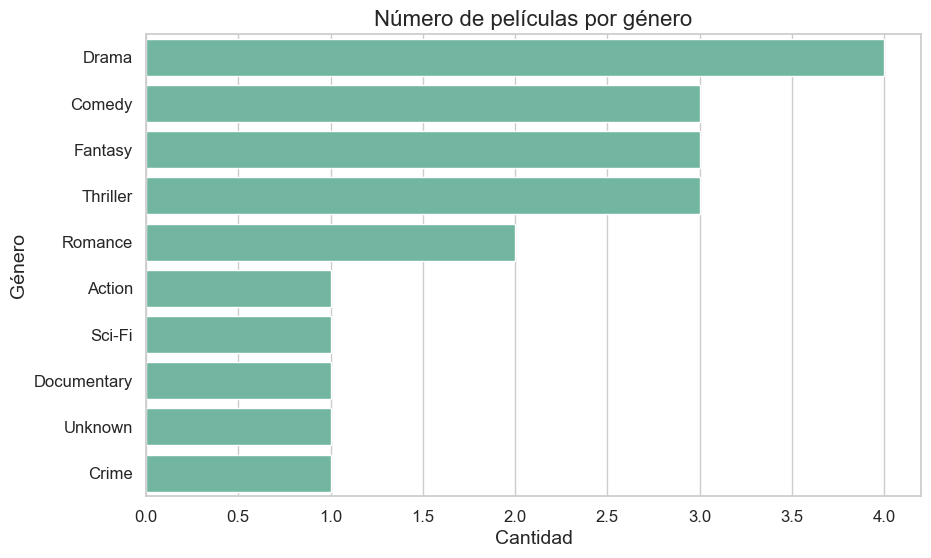

In [13]:
# Countplot genre
sns.countplot(y=df_movies["genre"], 
              order=df_movies["genre"].value_counts().index)

plt.title("Número de películas por género")
plt.xlabel("Cantidad")
plt.ylabel("Género")
plt.savefig("../reports/film_per_genre1.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
# Agrupar por género y sumar revenue
revenue_por_genero = df_movies.groupby("genre")["revenue"].sum().sort_values(ascending=False)
revenue_por_genero

genre
Drama          9.767795e+08
Comedy         7.368130e+08
Thriller       7.315508e+08
Fantasy        2.931191e+08
Unknown        2.180626e+08
Action         1.769979e+08
Sci-Fi         1.375882e+08
Romance        1.342619e+08
Documentary    6.080356e+07
Crime          5.851030e+07
Name: revenue, dtype: float64

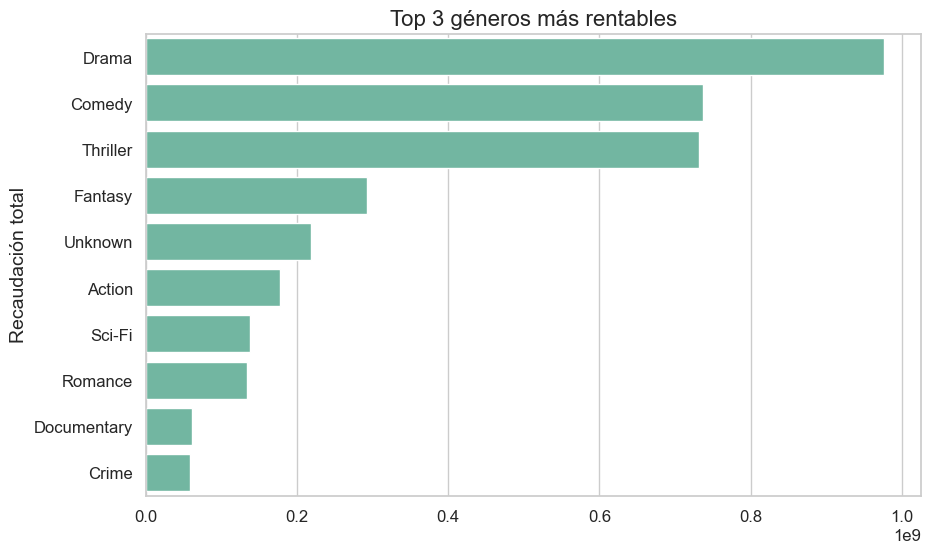

In [15]:
# Barplot revenue por genre
sns.barplot(y=revenue_por_genero.index, 
            x=revenue_por_genero.values)

plt.title("Top 3 géneros más rentables")
plt.ylabel("Recaudación total")
plt.savefig("../reports/top3_genre_revenue1.png", dpi=300, bbox_inches="tight")
plt.show()

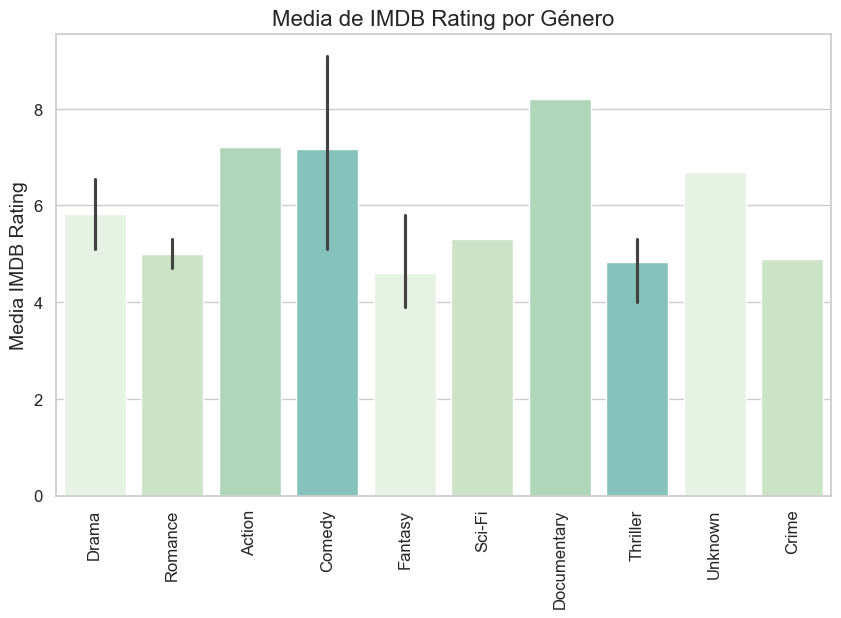

In [16]:
# Paleta de colores 
green_soft = ["#e5f5e0", "#c7e9c0", "#a8ddb5", "#7bccc4"]

# Barplot media rating por genre
sns.barplot(data=df_movies, 
            x="genre", 
            y="imdb_rating", 
            palette=green_soft)

plt.title("Media de IMDB Rating por Género")
plt.xlabel("")
plt.ylabel("Media IMDB Rating")
plt.xticks(rotation=90)
plt.savefig("../reports/media_rating_per_genre1.png", dpi=300, bbox_inches="tight")
plt.show()

**1.6 Evolución de rating por año**
- El año 2003 tiene las películas con mejor valoración media (8.2 IMdB), seguido por 2016 y 2007 con la misma (7.2 IMdB).
- 2019 es el año con peor valoracion media (3.9 IMdB).

In [17]:
# Agrupar por año y calcular la media del rating
rating_per_year = df_movies.groupby("year")["imdb_rating"].mean().reset_index()
rating_per_year.sort_values("imdb_rating", ascending=False)

,year,imdb_rating
2,2003,8.20
8,2016,7.20
5,2007,7.20
6,2008,6.70
3,2004,6.60
7,2011,6.30
13,2022,6.15
1,2001,5.30
9,2017,5.30
12,2020,5.00


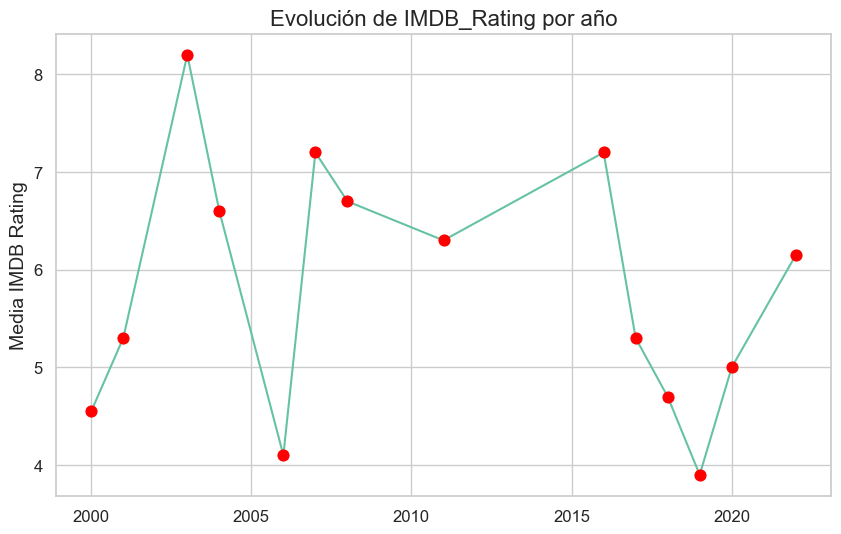

In [18]:
# Gráfico de lineas media rating por años
sns.lineplot(data=rating_per_year, 
             x="year", 
             y="imdb_rating",
             marker="o",                # puntos en cada año
             markersize=8,              # tamaño de los puntos
             markerfacecolor="red",     # color interior
             markeredgecolor="red")      # borde del punto

plt.title("Evolución de IMDB_Rating por año")
plt.xlabel("")
plt.ylabel("Media IMDB Rating")
plt.savefig("../reports/media_rating_per_year1.png", dpi=300, bbox_inches="tight")
plt.show()


**1.7 Distribución del rating**
- La valoracion (imdb_rating) media de las películas es 5.77.
- La mayoría de peliculas del dataset tienen valoraciones medias (entre el 4.8 y el 5.7), seguido por valoraciones medio-altas como el 7.
- Pocas películas tienen valoraciones extremas positivas y ninguna negativa extrema.

In [19]:
# Calcular media rating
mean_rating = df_movies["imdb_rating"].mean()
mean_rating

5.77

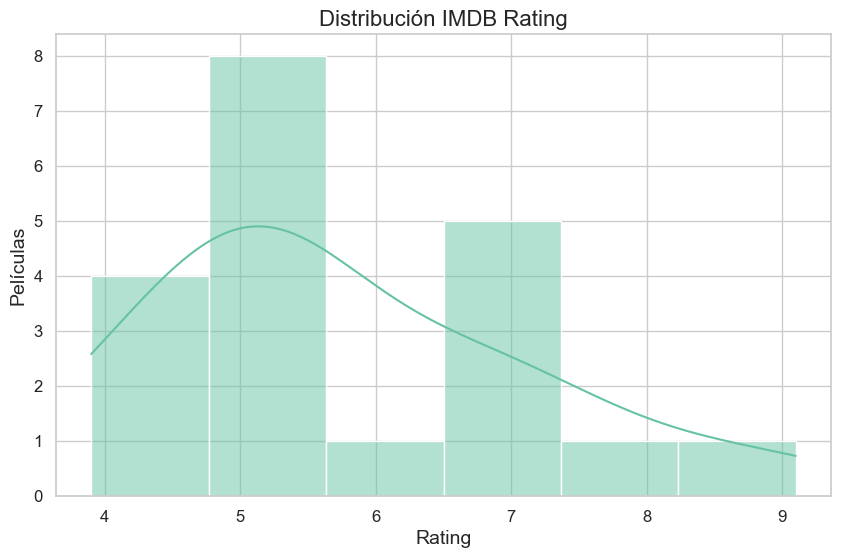

In [20]:
# Histplot rating, distribución de ratings
sns.histplot(df_movies["imdb_rating"], kde=True)
plt.title("Distribución IMDB Rating")
plt.xlabel("Rating")
plt.ylabel("Películas")
plt.savefig("../reports/distribucion_rating1.png", dpi=300, bbox_inches="tight")
plt.show()